In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Imports

In [2]:
from datetime import datetime, timedelta
import pandas as pd
import networkx as nx
import numpy as np
import copy
import pickle
import matplotlib.pyplot as plt

In [3]:
import torch
import random
import pickle
import os
import json
import glob
import hashlib
from tqdm import tqdm
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [4]:
import tensorflow as tf
from keras.layers import LSTM
import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

##Create Evolution Graphs

In [ ]:
PHIS_PATH = "/content/drive/MyDrive/data/phis_user_txs.csv"
NORM_PATH = "/content/drive/MyDrive/data/normal_user_txs_1165.csv"

In [ ]:
phis_users = pd.read_csv(PHIS_PATH)

In [ ]:
normal_users = pd.read_csv(NORM_PATH)

In [ ]:
phis_users

,Unnamed: 0,from,to,amount,timestamp,fromIsPhi,toIsPhi,date,idx,user
0,4115416,0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae28,0x65f4ae7400bf7bacb23e38018a511565ceb95f69,0.010000,1.504646e+09,1,0,2017-09-05,0.0,0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae28
1,4115829,0x786fda0bf7fbc69864544f621c96d1272fb267ed,0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae28,0.160000,1.505274e+09,0,1,2017-09-13,0.0,0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae28
2,4115647,0x9b9a6f262a6a99a2ed4c31be8d33b83c978cb551,0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae28,1.500000,1.504762e+09,0,1,2017-09-07,0.0,0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae28
3,4115501,0xc975f45b10e5e5b1cae4fd70107fbd28648723c9,0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae28,100.000000,1.504718e+09,0,1,2017-09-06,0.0,0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae28
4,4115447,0x774c080e0387de2704c7896b2487dbbfc8018746,0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae28,0.650000,1.504703e+09,0,1,2017-09-06,0.0,0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae28
...,...,...,...,...,...,...,...,...,...,...
60227,9370627,0x0e0745bc0532ea236e8326282750b9460df5d886,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c,0.435004,1.530805e+09,0,1,2018-07-05,1164.0,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c
60228,829348,0x1522900b6dafac587d499a862861c0869be6e428,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c,0.500000,1.530975e+09,0,1,2018-07-07,1164.0,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c
60229,10923805,0x364d0d14efaadb6be2c8a62fce99d52c257e927e,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c,0.500000,1.530925e+09,0,1,2018-07-07,1164.0,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c
60230,9109348,0xc56118e6a82917f453da9683cdcd51a84c239118,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c,0.500000,1.530924e+09,0,1,2018-07-07,1164.0,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c


In [ ]:
normal_users

,Unnamed: 0,from,to,amount,timestamp,fromIsPhi,toIsPhi,date,idx,user
0,1088662,0xb01cb49fe0d6d6e47edf3a072d15dfe73155331c,0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9,0.390000,1.498394e+09,0,0,2017-06-25,0.0,0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9
1,1670686,0x1c0d39bb7511653bd2ebea5b4d85608a908ed9f7,0x96c15263b10d52ca70ad560021e81058ae25dad1,0.142517,1.516943e+09,0,0,2018-01-26,1.0,0x96c15263b10d52ca70ad560021e81058ae25dad1
2,1670687,0x1c0d39bb7511653bd2ebea5b4d85608a908ed9f7,0x96c15263b10d52ca70ad560021e81058ae25dad1,0.142517,1.516943e+09,0,0,2018-01-26,1.0,0x96c15263b10d52ca70ad560021e81058ae25dad1
3,1670688,0x1c0d39bb7511653bd2ebea5b4d85608a908ed9f7,0x96c15263b10d52ca70ad560021e81058ae25dad1,0.142517,1.516943e+09,0,0,2018-01-26,1.0,0x96c15263b10d52ca70ad560021e81058ae25dad1
4,6057544,0x8264acb8929d0310f41e40abaf6da692f9f36ae5,0x12b19d3e2ccc14da04fae33e63652ce469b3f2fd,0.000000,1.517367e+09,0,0,2018-01-31,2.0,0x8264acb8929d0310f41e40abaf6da692f9f36ae5
...,...,...,...,...,...,...,...,...,...,...
3605,1226464,0xe8dfdb613576d9a263698880252e4b3b6e350e61,0xebb1f652db598bddf640a51c04860b6c9b6010c1,0.140000,1.514941e+09,0,0,2018-01-03,1160.0,0xebb1f652db598bddf640a51c04860b6c9b6010c1
3606,5670425,0xad68942a95fdd56594aa5cf862b358790e37834c,0x524d9d4f86e39d20a43006bb956790c5c3a90c94,0.000303,1.519056e+09,0,0,2018-02-19,1161.0,0x524d9d4f86e39d20a43006bb956790c5c3a90c94
3607,8038623,0xffc5dcf5d2949d7657d9d8ad3dbc84179e95fbb5,0xd738776e630f339fe2c63b4d13a90705f93d5c77,0.071300,1.520306e+09,0,0,2018-03-06,1162.0,0xffc5dcf5d2949d7657d9d8ad3dbc84179e95fbb5
3608,10195849,0xc674efe2f149d00bbecfc20a2078363de7d009ff,0x1c6ef3fda3848df98de96aca8e4788cba778b7ea,2.820000,1.502993e+09,0,0,2017-08-17,1163.0,0xc674efe2f149d00bbecfc20a2078363de7d009ff


In [ ]:
(phis_users["date"].min(), phis_users["date"].max()), (normal_users["date"].min(), normal_users["date"].max())

(('2016-11-30', '2019-01-17'), ('2016-11-30', '2019-01-06'))

In [ ]:
size_of_timestep = 2
no_of_users = 1165
range_of_timesteps = (phis_users["date"].min(), phis_users["date"].max())
date_format = "%Y-%m-%d"
start = datetime.strptime(range_of_timesteps[0], date_format)
end = datetime.strptime(range_of_timesteps[1], date_format)
no_of_timesteps = ((end-start).days) // size_of_timestep
range_of_timesteps, size_of_timestep, no_of_timesteps

(('2016-11-30', '2019-01-17'), 2, 389)

In [ ]:
dates = []
diff = 0
for i in range(no_of_timesteps):
  dates.append(((start + timedelta(days=diff)).strftime("%Y-%m-%d"), (start + timedelta(days=diff+1)).strftime("%Y-%m-%d")))
  diff += 2

In [ ]:
def create_evolution_graphs(user_df, dates, label):
  init_graph = nx.MultiDiGraph()
  init_graph.add_node(user_df['user'].values[0])
  user_graphs = []
  for time_interval in dates:
    results = user_df.loc[user_df['date'].isin(time_interval)]
    if len(results) > 0:
      for idx, row in results.iterrows():
        init_graph.add_edge(row['from'], row['to'])
    user_graphs.append({'graph':copy.deepcopy(init_graph), 'label': label})
  return user_graphs

### Saving Graphs

In [ ]:
with open("/content/drive/MyDrive/data/phis_users_ev_graphs.pkl", "wb") as output_file:
  for i in range(1165):
    print(i)
    user_txs = phis_users.loc[phis_users['idx'] == i]
    user_df = user_txs.sort_values('date')
    user_ev_graphs = create_evolution_graphs(user_df, dates, 1)
    pickle.dump(user_ev_graphs, output_file)


0


NameError: ignored

In [ ]:
with open("/content/drive/MyDrive/data/normal_users_ev_graphs.pkl", "wb") as output_file:
  for i in range(1165):
    print(i)
    user_txs = normal_users.loc[normal_users['idx'] == i]
    user_df = user_txs.sort_values('date')
    user_ev_graphs = create_evolution_graphs(user_df, dates, 0)
    pickle.dump(user_ev_graphs, output_file)

0


NameError: ignored

In [ ]:
with open("/content/drive/MyDrive/data/ev_graphs.pkl", "wb") as output_file:
  for i in tqdm(range(1165)):
    user_txs = normal_users.loc[normal_users['idx'] == i]
    user_df = user_txs.sort_values('date')
    user_ev_graphs = create_evolution_graphs(user_df, dates,0)
    pickle.dump(user_ev_graphs, output_file)
  for i in tqdm(range(1165)):
    user_txs = phis_users.loc[phis_users['idx'] == i]
    user_df = user_txs.sort_values('date')
    user_ev_graphs = create_evolution_graphs(user_df, dates, 1)
    pickle.dump(user_ev_graphs, output_file)

100%|██████████| 1165/1165 [07:21<00:00,  2.64it/s]


In [ ]:
labels = []
with open("/content/drive/MyDrive/data/ev_graphs.pkl", "rb") as output_file:
    for i in range(2330):
      usergraphs = pickle.load(output_file)
      labels.extend([graph['label'] for graph in usergraphs])

## Embedding Evolution Graphs

In [ ]:
#PATH_TO_PHIS_GRAPHS = "/content/drive/MyDrive/data/phis_users_ev_graphs.pkl"
#PATH_TO_NORMAL_GRAPHS = "/content/drive/MyDrive/data/normal_users_ev_graphs.pkl"
PATH_TO_GRAPHS = "/content/drive/MyDrive/data/ev_graphs.pkl"

In [ ]:
args = {
    "learning_rate": 0.25,
    "down_sampling": 0.0001,
    "dimensions": 32, #Tuning this
    "workers": 4,
    "epochs": 10,
    "min_count": 5,
    "wl_iterations": 4,
    "output_path": "/content/drive/MyDrive/data/graph_embeddings/ev_32_wit_8.csv",
    "input_path": PATH_TO_GRAPHS
}

In [ ]:
class WeisfeilerLehmanMachine:
    """
    Weisfeiler Lehman feature extractor class.
    """
    def __init__(self, graph, features, iterations):
        """
        Initialization method which also executes feature extraction.
        :param graph: The Nx graph object.
        :param features: Feature hash table.
        :param iterations: Number of WL iterations.
        """
        self.iterations = iterations
        self.graph = graph["graph"]
        self.features = features
        self.nodes = self.graph.nodes()
        self.extracted_features = [str(v) for k, v in features.items()]
        self.do_recursions()

    def do_a_recursion(self):
        """
        The method does a single WL recursion.
        :return new_features: The hash table with extracted WL features.
        """
        new_features = {}
        for node in self.nodes:
            nebs = self.graph.neighbors(node)
            degs = [self.features[neb] for neb in nebs]
            features = [str(self.features[node])]+sorted([str(deg) for deg in degs])
            features = "_".join(features)
            hash_object = hashlib.md5(features.encode())
            hashing = hash_object.hexdigest()
            new_features[node] = hashing
        self.extracted_features = self.extracted_features + list(new_features.values())
        return new_features

    def do_recursions(self):
        """
        The method does a series of WL recursions.
        """
        for _ in range(self.iterations):
            self.features = self.do_a_recursion()

In [ ]:
def dataset_generator(path):
  """
    Function to read the graph and features from a json file.
    :param path: The path to the graph json.
    :return graph: The graph object.
    :return features: Features hash table.
    :return name: Name of the graph.
    """
  with open(path, 'rb') as handle:
    idx = 0
    while True:
      try:
        data = pickle.load(handle)
        for graph in data:
          features = nx.degree(graph["graph"])
          features = {k: v for k, v in features}
          print(idx)
          yield graph, features, str(idx)
          idx += 1
      except EOFError:
        break

In [ ]:
def feature_extractor(path, rounds):
    """
    Function to extract WL features from a graph.
    :param path: The path to the graph json.
    :param rounds: Number of WL iterations.
    :return doc: Document collection object.
    """
    docs = []
    for triple in dataset_generator(path):
      graph, features, name = triple
      machine = WeisfeilerLehmanMachine(graph, features, rounds)
      doc = TaggedDocument(words=machine.extracted_features, tags=["g_" + name])
      docs.append(doc)
    return docs

In [ ]:
def save_embedding(output_path, model, max_cnt, dimensions):
    """
    Function to save the embedding.
    :param output_path: Path to the embedding csv.
    :param model: The embedding model object.
    :param files: The list of files.
    :param dimensions: The embedding dimension parameter.
    """
    out = []
    for i in range(max_cnt):
        out.append([i] + list(model.docvecs["g_"+str(i)]))
    column_names = ["id"]+["x_"+str(dim) for dim in range(dimensions)]
    out = pd.DataFrame(out, columns=column_names)
    out = out.set_index(["id"])
    print(out)
    out.to_csv(output_path, index=None)

In [ ]:
def main(args):
    """
    Main function to read the graph list, extract features.
    Learn the embedding and save it.
    :param args: Object with the arguments.
    """
    print("\nFeature extraction started.\n")
    print("\nOptimization started.\n")
    docs = feature_extractor(args["input_path"], args["wl_iterations"])
    model = Doc2Vec(documents=docs,
                    vector_size=args["dimensions"],
                    window=0,
                    min_count=args["min_count"],
                    dm=0,
                    sample=args["down_sampling"],
                    workers=args["workers"],
                    epochs=args["epochs"],
                    alpha=args["learning_rate"])
    return model, docs

In [ ]:
model, docs = main(args)

Streaming output truncated to the last 5000 lines.
901370
901371
901372
901373
901374
901375
901376
901377
901378
901379
901380
901381
901382
901383
901384
901385
901386
901387
901388
901389
901390
901391
901392
901393
901394
901395
901396
901397
901398
901399
901400
901401
901402
901403
901404
901405
901406
901407
901408
901409
901410
901411
901412
901413
901414
901415
901416
901417
901418
901419
901420
901421
901422
901423
901424
901425
901426
901427
901428
901429
901430
901431
901432
901433
901434
901435
901436
901437
901438
901439
901440
901441
901442
901443
901444
901445
901446
901447
901448
901449
901450
901451
901452
901453
901454
901455
901456
901457
901458
901459
901460
901461
901462
901463
901464
901465
901466
901467
901468
901469
901470
901471
901472
901473
901474
901475
901476
901477
901478
901479
901480
901481
901482
901483
901484
901485
901486
901487
901488
901489
901490
901491
901492
901493
901494
901495
901496
901497
901498
901499
901500
901501
901502
901503
901504
9015

In [ ]:
len(model.docvecs[0])

32

In [ ]:
model

In [ ]:
len(docs)

906370

In [ ]:
save_embedding(args["output_path"], model, no_of_timesteps*2*no_of_users, args["dimensions"])

In [ ]:
phis_users = list(phis_users["user"].unique())
normal_users = list(normal_users["user"].unique())

In [ ]:
len(normal_users), len(phis_users)

(1165, 1165)

In [ ]:
len(normal_users + phis_users)

2330

In [ ]:
all_users_series = pd.Series(normal_users+phis_users)

In [ ]:
user_series = all_users_series.repeat(no_of_timesteps)
user_series

0       0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9
0       0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9
0       0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9
0       0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9
0       0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9
                           ...                    
2329    0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c
2329    0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c
2329    0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c
2329    0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c
2329    0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c
Length: 906370, dtype: object

In [ ]:
classes = pd.Series([0,1])
labels = classes.repeat(no_of_users*no_of_timesteps)
labels = labels.reset_index(drop=True)
labels_list = labels.tolist()

In [ ]:
label_df = user_series.to_frame()
label_df["isPhi"] = labels_list
label_df

,0,isPhi
0,0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9,0
0,0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9,0
0,0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9,0
0,0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9,0
0,0x0ca6c53222c700bf3ee1df1b8d7d5301f21de8b9,0
...,...,...
2329,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c,1
2329,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c,1
2329,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c,1
2329,0xc1e6720f94a8d73e77a94d16fb76f7dd6edff54c,1


In [ ]:
label_df.to_csv("/content/drive/MyDrive/data/graph_embeddings/ev_labels_32.csv")

In [ ]:
label_df.iloc[453185]

0        0x3fcb2d173389b7cd8079ef8b439dbd92e7e0ae28
isPhi                                             1
Name: 1165, dtype: object

In [ ]:
del phis_users
del normal_users

## Feeding Embeddings to LSTMs and BiLSTMs

In [5]:
labels_df = pd.read_csv("/content/drive/MyDrive/data/graph_embeddings/ev_labels.csv")
graphs_df = pd.read_csv("/content/drive/MyDrive/data/graph_embeddings/ev.csv")

In [6]:
embed_size = 128

In [7]:
X = graphs_df.to_numpy().reshape((2330,389,embed_size))
y = labels_df.to_numpy().reshape((2330,389,3))[:,:,2][:,:,np.newaxis]

In [8]:
del graphs_df
del labels_df

### Data Preprocesing

In [9]:
X, y = shuffle(X, y, random_state=59)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [11]:
batch_size = 16
buffer_size = 16

In [12]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).shuffle(buffer_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).shuffle(buffer_size)

### Building the Model

In [16]:
inputs = keras.layers.Input(shape=(389, embed_size,))
lstm = keras.layers.LSTM(units=389, name='LSTM_layer_1', return_sequences=True)(inputs)
lstm_2 = keras.layers.LSTM(units=389, name='LSTM_layer_2', return_sequences=True)(lstm)
outputs = keras.layers.Dense(1, activation='sigmoid')(lstm_2)
model_1 = keras.Model(inputs=inputs, outputs=outputs, name="class_model")
print(model_1.summary())

Model: "class_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 389, 128)]        0         
                                                                 
 LSTM_layer_1 (LSTM)         (None, 389, 389)          806008    
                                                                 
 LSTM_layer_2 (LSTM)         (None, 389, 389)          1212124   
                                                                 
 dense_1 (Dense)             (None, 389, 1)            390       
                                                                 
Total params: 2,018,522
Trainable params: 2,018,522
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
inputs = keras.layers.Input(shape=(389, 128,))
lstm = keras.layers.Bidirectional(keras.layers.LSTM(units=389, name='LSTM_layer_1',return_sequences=True))(inputs)
outputs = keras.layers.Dense(1, activation='sigmoid')(lstm)
model_2 = keras.Model(inputs=inputs, outputs=outputs, name="class_model")
print(model_2.summary())

Model: "class_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 389, 128)]        0         
                                                                 
 bidirectional (Bidirectiona  (None, 389, 778)         1612016   
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 389, 1)            779       
                                                                 
Total params: 1,612,795
Trainable params: 1,612,795
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
opt_1 = tf.keras.optimizers.Adam(learning_rate=0.00001)
opt_2 = tf.keras.optimizers.Adam(learning_rate=0.00001)

model_1.compile(loss='binary_crossentropy', optimizer=opt_1, metrics=['accuracy', tf.keras.metrics.Recall()])
model_2.compile(loss='binary_crossentropy', optimizer=opt_2, metrics=['accuracy', tf.keras.metrics.Recall()])

In [20]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/models/graph2vec_lstm.ckpt",
                                                 save_weights_only=True,
                                                 verbose=1)

### Training Models(embed_size = 64)

In [ ]:
history = model_1.fit(train_ds,
                    validation_data=test_ds, 
                    epochs=10,
                    callbacks=[cp_callback]
                   )

Epoch 1/10
132/132 [==============================] - ETA: 0s - loss: 0.6881 - accuracy: 0.5817 - recall_4: 0.6190
Epoch 1: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 125s 937ms/step - loss: 0.6881 - accuracy: 0.5817 - recall_4: 0.6190 - val_loss: 0.6811 - val_accuracy: 0.6537 - val_recall_4: 0.8020
Epoch 2/10
132/132 [==============================] - ETA: 0s - loss: 0.6750 - accuracy: 0.6342 - recall_4: 0.8364
Epoch 2: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 121s 918ms/step - loss: 0.6750 - accuracy: 0.6342 - recall_4: 0.8364 - val_loss: 0.6647 - val_accuracy: 0.7297 - val_recall_4: 0.7832
Epoch 3/10
132/132 [==============================] - ETA: 0s - loss: 0.6372 - accuracy: 0.7224 - recall_4: 0.7783
Epoch 3: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 123s 929ms/step - loss: 0.6372 - 

In [ ]:
prediction = (model_1.predict(X_test) > 0.5).astype("int32")

8/8 [==============================] - 3s 359ms/step


In [ ]:
y_test.shape

(233, 389, 1)

In [ ]:
print(classification_report(y_test.reshape(90637,1), prediction.reshape(90637,1)))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     48236
         1.0       0.96      0.84      0.90     42401

    accuracy                           0.91     90637
   macro avg       0.92      0.91      0.91     90637
weighted avg       0.92      0.91      0.91     90637



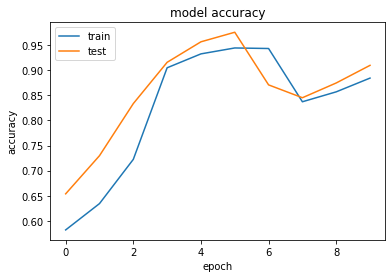

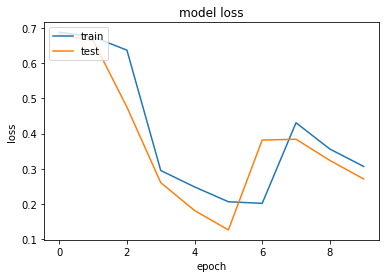

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Embed_size = 32 WIT=2

In [ ]:
history = model_1.fit(train_ds,
                    validation_data=test_ds, 
                    epochs=30,
                    callbacks=[cp_callback]
                   )

Epoch 1/30
132/132 [==============================] - ETA: 0s - loss: 0.1445 - accuracy: 0.9644 - recall_6: 0.9627
Epoch 1: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 120s 906ms/step - loss: 0.1445 - accuracy: 0.9644 - recall_6: 0.9627 - val_loss: 0.0900 - val_accuracy: 0.9816 - val_recall_6: 0.9817
Epoch 2/30
132/132 [==============================] - ETA: 0s - loss: 0.1428 - accuracy: 0.9651 - recall_6: 0.9619
Epoch 2: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 118s 897ms/step - loss: 0.1428 - accuracy: 0.9651 - recall_6: 0.9619 - val_loss: 0.1003 - val_accuracy: 0.9810 - val_recall_6: 0.9976
Epoch 3/30
132/132 [==============================] - ETA: 0s - loss: 0.2127 - accuracy: 0.9481 - recall_6: 0.9926
Epoch 3: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 120s 907ms/step - loss: 0.2127 - 

8/8 [==============================] - 3s 365ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     48236
         1.0       0.97      0.98      0.98     42401

    accuracy                           0.98     90637
   macro avg       0.98      0.98      0.98     90637
weighted avg       0.98      0.98      0.98     90637



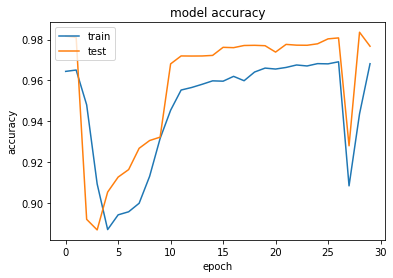

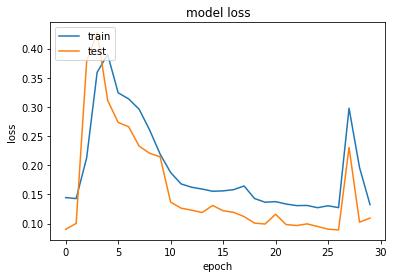

In [ ]:
prediction = (model_1.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test.reshape(90637,1), prediction.reshape(90637,1)))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Embed_size = 32 WIT=1

In [ ]:
history = model_1.fit(train_ds,
                    validation_data=test_ds, 
                    epochs=30,
                    callbacks=[cp_callback]
                   )

Epoch 1/30
132/132 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.4844 - recall: 0.9176
Epoch 1: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 133s 993ms/step - loss: 0.6906 - accuracy: 0.4844 - recall: 0.9176 - val_loss: 0.6882 - val_accuracy: 0.5028 - val_recall: 0.9051
Epoch 2/30
132/132 [==============================] - ETA: 0s - loss: 0.6839 - accuracy: 0.5287 - recall: 0.9282
Epoch 2: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 127s 964ms/step - loss: 0.6839 - accuracy: 0.5287 - recall: 0.9282 - val_loss: 0.6812 - val_accuracy: 0.6198 - val_recall: 0.8287
Epoch 3/30
132/132 [==============================] - ETA: 0s - loss: 0.6742 - accuracy: 0.6544 - recall: 0.8066
Epoch 3: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 133s 1s/step - loss: 0.6742 - accuracy: 0.6544 

8/8 [==============================] - 4s 397ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     48236
         1.0       0.92      0.99      0.95     42401

    accuracy                           0.95     90637
   macro avg       0.95      0.95      0.95     90637
weighted avg       0.95      0.95      0.95     90637



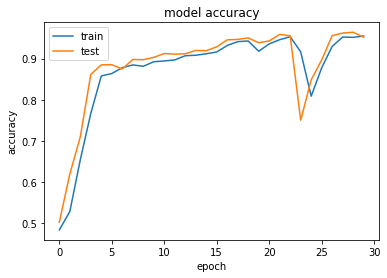

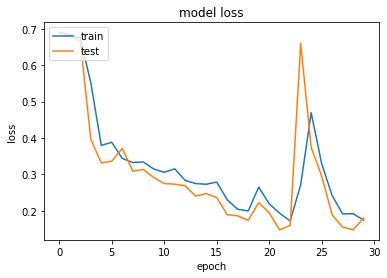

In [ ]:
prediction = (model_1.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test.reshape(90637,1), prediction.reshape(90637,1)))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Embed_size = 32 WIT=4

In [ ]:
history = model_1.fit(train_ds,
                    validation_data=test_ds, 
                    epochs=30,
                    callbacks=[cp_callback]
                   )

Epoch 1/30
132/132 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.4709 - recall_2: 0.7894
Epoch 1: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 143s 1s/step - loss: 0.6905 - accuracy: 0.4709 - recall_2: 0.7894 - val_loss: 0.6864 - val_accuracy: 0.4473 - val_recall_2: 0.8696
Epoch 2/30
132/132 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.4868 - recall_2: 0.8498
Epoch 2: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 136s 1s/step - loss: 0.6822 - accuracy: 0.4868 - recall_2: 0.8498 - val_loss: 0.6767 - val_accuracy: 0.5467 - val_recall_2: 0.8176
Epoch 3/30
132/132 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.5856 - recall_2: 0.7800
Epoch 3: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 136s 1s/step - loss: 0.6728 - accuracy:

8/8 [==============================] - 3s 384ms/step
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     48236
         1.0       0.97      0.93      0.95     42401

    accuracy                           0.95     90637
   macro avg       0.95      0.95      0.95     90637
weighted avg       0.95      0.95      0.95     90637



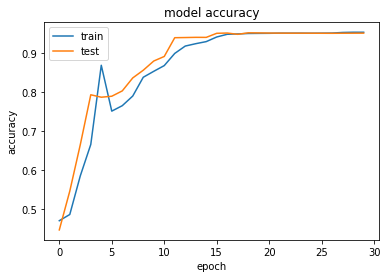

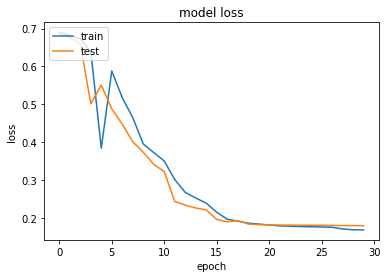

In [ ]:
prediction = (model_1.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test.reshape(90637,1), prediction.reshape(90637,1)))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### LSTM LAYERS = 2

In [21]:
history = model_1.fit(train_ds,
                    validation_data=test_ds, 
                    epochs=10,
                    callbacks=[cp_callback]
                   )

Epoch 1/10
132/132 [==============================] - ETA: 0s - loss: 0.6837 - accuracy: 0.5372 - recall_1: 0.9056
Epoch 1: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 372s 3s/step - loss: 0.6837 - accuracy: 0.5372 - recall_1: 0.9056 - val_loss: 0.6719 - val_accuracy: 0.7141 - val_recall_1: 0.7358
Epoch 2/10
132/132 [==============================] - ETA: 0s - loss: 0.6406 - accuracy: 0.7112 - recall_1: 0.7169
Epoch 2: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 343s 3s/step - loss: 0.6406 - accuracy: 0.7112 - recall_1: 0.7169 - val_loss: 0.5726 - val_accuracy: 0.7523 - val_recall_1: 0.7308
Epoch 3/10
132/132 [==============================] - ETA: 0s - loss: 0.4306 - accuracy: 0.8372 - recall_1: 0.8057
Epoch 3: saving model to /content/drive/MyDrive/models/graph2vec_lstm.ckpt
132/132 [==============================] - 343s 3s/step - loss: 0.4306 - accuracy:

8/8 [==============================] - 9s 976ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     48236
         1.0       0.96      0.99      0.98     42401

    accuracy                           0.98     90637
   macro avg       0.98      0.98      0.98     90637
weighted avg       0.98      0.98      0.98     90637



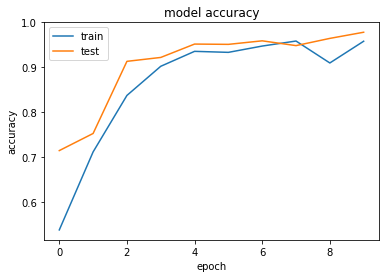

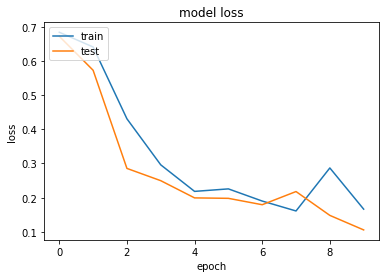

In [22]:
prediction = (model_1.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test.reshape(90637,1), prediction.reshape(90637,1)))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()